# 乱数を使って保持器を作る

In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(0)
params = np.random.randn(100, 10) / 3
params[params<-1] = -1
params[params>1] = 1
params[:2]

array([[ 0.58801745,  0.13338574,  0.32624599,  0.7469644 ,  0.62251933,
        -0.32575929,  0.31669614, -0.0504524 , -0.03440628,  0.13686617],
       [ 0.04801452,  0.48475784,  0.25367924,  0.04055834,  0.14795441,
         0.11122478,  0.49802636, -0.06838609,  0.1043559 , -0.28469858]])

In [3]:
params.max(), params.min()

(0.919785038007194, -1.0)

In [4]:
r0 = lambda dr: 2.35e-3 + dr
r1 = lambda dr: 2.85e-3 + dr

r0(0.25e-3), r1(-0.25e-3)

(0.0026, 0.0026)

In [5]:
r0s = r0(params[:, 0] * 0.2e-3)
r1s = r1(params[:, 1] * 0.2e-3)
drs = r1s - r0s

drs.min() * 1e3, drs.max() * 1e3, r0s.min() * 1e3, r1s.max() * 1e3


(0.2846060161200868,
 0.7137738940849623,
 2.1778135578020037,
 2.9786354702544657)

In [6]:
h0 = lambda dh: 0.93e-3 + dh
h1 = lambda dh: 2.10e-3 + dh

h0s = h0(params[:, 2] * 0.2e-3)
h1s = h1(params[:, 3] * 0.2e-3)

h0s.max() * 1e3, h0s.min() * 1e3, h1s.max() * 1e3, h1s.min() * 1e3

(1.0835944465122629,
 0.7796290513731874,
 2.2839570076014386,
 1.9517731231850382)

In [7]:
bevel = lambda r: 0.1 * drs * r

bevels = bevel(params[:, 4]+2)

(bevels / drs).max(), (bevels / drs).min()

(0.2898741350854526, 0.11136092540010864)

In [8]:
pocket_r = lambda dr: 0.825e-3 + dr

pocket_rs = pocket_r(params[:, 5] * 1e-6)
pocket_rs.min() * 1e3, pocket_rs.max() * 1e3

(0.8240551484982418, 0.8258041512265145)

In [9]:
neck_x = lambda dx: 1.70e-3 + dx

neck_xs = neck_x(params[:, 6] * 20e-6)
neck_xs.min() * 1e3, neck_xs.max() * 1e3

(1.6842388412190585, 1.7141119401432245)

In [10]:
neck_r = lambda dr: 1.20e-3 + dr

neck_rs = neck_r(params[:, 7] * 20e-6)
neck_rs.min() * 1e3, neck_rs.max() * 1e3


(1.1817354855520694, 1.2150448233153213)

In [11]:
neck_h = lambda dh: 2.45e-3 + dh

neck_hs = neck_h(params[:, 8] * 100e-6)
neck_hs.min() * 1e3, neck_hs.max() * 1e3


(2.37101376982578, 2.5364808195922715)

In [12]:
neck_dh = lambda r: (neck_hs - h1s) * r * 0.1

neck_dhs = neck_dh(params[:, 9]+2)
neck_dhs.min() * 1e3, neck_dhs.max() * 1e3


(0.028458986531231186, 0.12664880375765164)

In [13]:
df = pd.DataFrame({
    'r0': r0s,
    'r1': r1s,
    'h0': h0s,
    'h1': h1s,
    'bevel': bevels,
    'pocket_r': pocket_rs,
    'neck_x': neck_xs,
    'neck_r': neck_rs,
    'neck_h': neck_hs,
    'neck_dh': neck_dhs
})

df.to_csv('../data/random/random_params.csv', index=False)


In [14]:
# cargo run --release "data/Tetra.vtu,data/face_and_edge_index.xml,data/Tetra_linspace.vtu" "2.345e-3,2.850e-3,0.93e-3,2.10e-3,0.10e-3,0.825e-3,1.70e-3,1.20e-3,2.45e-3,0.152e-3" "100"

command_args0 = lambda i: f"\"data/Tetra.vtu,data/face_and_edge_index.xml,data/random/Tetra_linspace{i}.vtu\" "
command_args0(0)


'"data/Tetra.vtu,data/face_and_edge_index.xml,data/random/Tetra_linspace0.vtu" '

In [15]:
command_args1 = lambda i: f'\"{r0s[i]},{r1s[i]},{h0s[i]},{h1s[i]},{bevels[i]},{pocket_rs[i]},{neck_xs[i]},{neck_rs[i]},{neck_hs[i]},{neck_dhs[i]}\" \"1000\"'
command_args1(10)

# '../data/Tetra_linspace10.vtu 0.0024755433798037503 0.002760149395923837 0.0008453010001009512 0.002164626447210534 4.579193726579163e-05 0.0008256478737285498 0.0016972425401282683 0.0011950169679237283 0.002514098067549346 0.0001742818416754026 1000'

'"0.0024755433798037503,0.002760149395923837,0.0008453010001009512,0.002164626447210534,4.579193726579163e-05,0.0008256478737285498,0.0016972425401282683,0.0011950169679237283,0.002514098067549346,8.71409208377013e-05" "1000"'

In [16]:
import subprocess

command = "cd ../; cargo run --release "
result = subprocess.run(command + command_args0(0) + command_args1(0), shell=True)


    Finished release [optimized] target(s) in 0.28s
     Running `target/release/mophing data/Tetra.vtu,data/face_and_edge_index.xml,data/random/Tetra_linspace0.vtu 0.0024676034897311776,0.0028766771472244815,0.0009952491989403827,0.0022493928799467637,0.00010728035741904383,0.0008246742407067079,0.0017063339227835039,0.001198990951944682,0.002446559371606881,4.213184053562646e-05 1000`


[["data/Tetra.vtu", "data/face_and_edge_index.xml", "data/random/Tetra_linspace0.vtu"], ["0.0024676034897311776", "0.0028766771472244815", "0.0009952491989403827", "0.0022493928799467637", "0.00010728035741904383", "0.0008246742407067079", "0.0017063339227835039", "0.001198990951944682", "0.002446559371606881", "4.213184053562646e-05"], ["1000"]]


thread 'main' panicked at src/main.rs:24:46:
index out of bounds: the len is 1 but the index is 1
note: run with `RUST_BACKTRACE=1` environment variable to display a backtrace


KeyboardInterrupt: 

In [ ]:
output_span = 10

for i in range(len(params)):
    subprocess.run(command + command_args0(i) + command_args1(i), shell=True, capture_output=True, text=True)
    
    if i % output_span == 0:
        print(f"Done {i}")


Done 0


KeyboardInterrupt: 

## 体積が負のメッシュを可視化



In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pyvista as pv


In [2]:
# ファイル名を指定してデータを読み込む
full_mesh = pv.read('../data/Tetra_smoothed.vtu')
# full_mesh = pv.read('../data/random/Tetra_linspace0.vtu')
# full_mesh = pv.read('../data/Tetra_smoothed.vtu')
full_points = np.array(full_mesh.points.tolist()) 
full_points.shape


(66723, 3)

In [3]:
def calculate_volume(mesh):
    # Get the cells from the mesh
    cells = mesh.cells.reshape(-1, 5)[:, 1:]

    # Calculate the volume of each tetrahedron
    volumes = np.zeros(len(cells))
    # for cell in cells:
    for i in range(len(cells)):
        cell = cells[i]
        # Get the points of the tetrahedron
        points = np.array(mesh.points[cell])

        # Calculate the vectors formed by the points
        vectors = points[1:] - points[0]

        # Calculate the volume using the cross product
        volumes[i] = (np.dot(vectors[0], np.cross(vectors[1], vectors[2]))) / 6

    return volumes

volumes = calculate_volume(full_mesh)



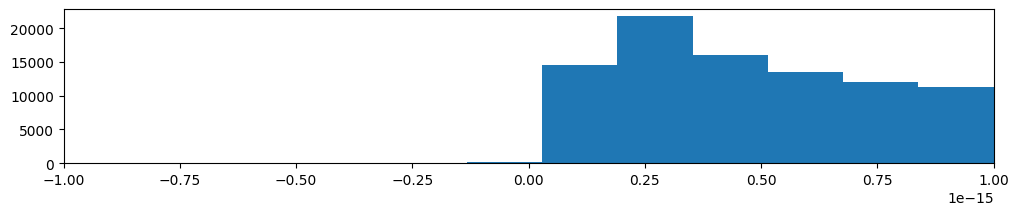

(3.0833846648462503e-14, -1.6081394390322448e-13, 1.4929857119113283e-12)

In [4]:
plt.figure(figsize=(12, 2))
plt.hist(volumes[volumes<1e-15], bins=1000)
plt.xlim([-1e-15,1e-15])
plt.show()

volumes.mean(), volumes.min(), volumes.max()

In [5]:
minus_volume_tetra = np.where(np.array(volumes) < 0)[0]
cells0 = np.array(full_mesh.cells.tolist()).reshape(-1, 5)[:, 1:]

cells0.shape, minus_volume_tetra.shape, minus_volume_tetra.max()


((295008, 4), (221,), 294569)

In [6]:
minus_volume_tetra

array([   916,   3267,   7407,   7512,   8919,   8957,  14278,  16394,
        16466,  20535,  23386,  32755,  38602,  39328,  44454,  50368,
        50676,  51133,  53818,  57291,  57310,  58669,  63917,  64481,
        64630,  64978,  67142,  67252,  69380,  72512,  75359,  75528,
        75539,  76584,  83519,  84236,  90006,  90296,  93052,  93835,
        96389,  97834,  98863,  99861, 102738, 103079, 104476, 104745,
       105519, 106464, 107191, 109202, 109268, 110274, 111061, 111706,
       113633, 113978, 115238, 118108, 119745, 120409, 121417, 121933,
       122109, 126398, 127473, 127786, 128731, 130029, 130702, 130968,
       132978, 133943, 137099, 137744, 139053, 140495, 143128, 143586,
       144138, 144414, 145120, 147880, 148051, 148402, 148801, 149104,
       151943, 155237, 155948, 156033, 156873, 158024, 159521, 159813,
       160021, 160942, 161274, 162622, 163951, 167845, 170064, 172397,
       175300, 181242, 181576, 183506, 183602, 184794, 186582, 187539,
      

In [7]:
# minus_volume_index = cells0[minus_volume_tetra].flatten()
# minus_volume_index = np.unique(minus_volume_index)

# full_points = np.array(full_mesh.points.tolist())
# minus_points = full_points[minus_volume_index]
# minus_points.shape


In [8]:
surface_index = full_mesh.surface_indices()
minus_volume_index = cells0[minus_volume_tetra]

all_surface = []

for index in cells0:
    bool_array = [i in surface_index for i in index]

    if sum(bool_array) == 4:
        all_surface.append(index)

all_surface = np.array(all_surface).flatten()
all_surface = np.unique(all_surface)

all_points = full_points[all_surface]

minus_surface = []

# for index in cells0:
for index in minus_volume_index:
    bool_array = [i in surface_index for i in index]

    if sum(bool_array) == 4:
        minus_surface.append(index)

minus_surface = np.array(minus_surface).flatten()
minus_surface = np.unique(minus_surface)
minus_surface = np.zeros(full_points.shape, dtype=bool) if minus_surface.shape[0]==0 else minus_surface

In [9]:
minus_surface.shape

(66723, 3)

In [10]:
minus_points = full_points[minus_surface]
surface_points = full_points[surface_index]

minus_points.shape, minus_surface.shape, surface_points.shape

((0,), (66723, 3), (39585, 3))

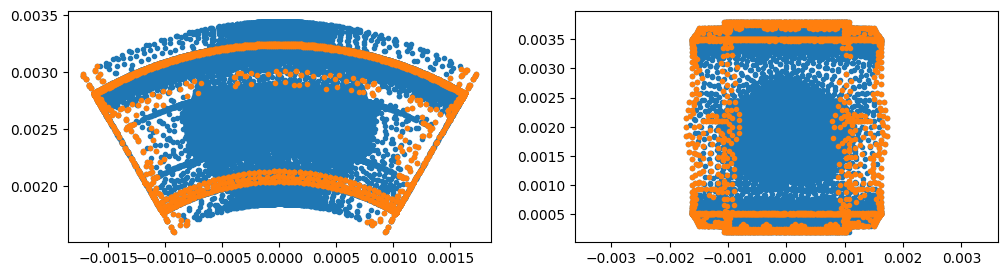

In [11]:
fig,ax = plt.subplots(1, 2, figsize=(12, 3))

for i in [0,1]:
    ax[i].plot(surface_points[:,0], surface_points[:,1+i], '.')
    ax[i].plot(all_points[:,0], all_points[:,1+i], '.')
    # ax[i].plot(minus_points[:,0], minus_points[:,1+i], '.')
    ax[i].axis('equal')
plt.show()

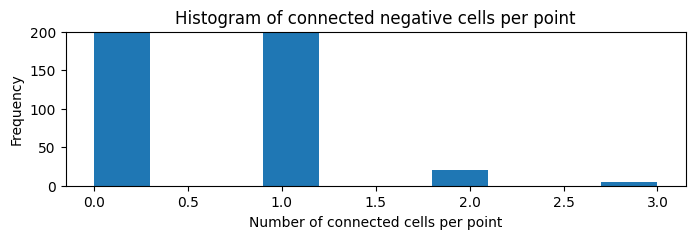

In [12]:
import matplotlib.pyplot as plt

# 各点の接続情報を持つ配列を作成する
point_connections = [[] for _ in range(len(full_points))]
for i, cell in enumerate(cells0):
    if i in minus_volume_tetra:
        for j in cell:
            point_connections[j].append(i)

# 各点から繋がっているセルの数を数える
connected_cell_counts = np.array([len(connections) for connections in point_connections])

# ヒストグラムを作成する
plt.figure(figsize=(8, 2))
plt.hist(connected_cell_counts) #, bins=range(max(connected_cell_counts)+2))
plt.xlabel('Number of connected cells per point')
plt.ylabel('Frequency')
plt.title('Histogram of connected negative cells per point')
plt.ylim(0, 200)
plt.show()

In [13]:
connected_cell_counts.shape, connected_cell_counts.max(), cells0.shape

((66723,), 3, (295008, 4))

In [14]:
num_1 = np.arange(len(connected_cell_counts))[connected_cell_counts==1]
num_1

array([   26,   166,   276,   277,   600,   817,   939,  1051,  1610,
        1704,  1810,  1832,  1833,  1897,  2026,  2109,  2210,  2211,
        2356,  2388,  2389,  2523,  2528,  2534,  2617,  2915,  3412,
        3568,  3759,  3777,  3939,  4125,  4127,  4145,  4491,  4511,
        4673,  5089,  5293,  5634,  5866,  6187,  6458,  6979,  7152,
        7689,  8227,  8486,  8648,  9060,  9371,  9781,  9832,  9839,
       10207, 10404, 10675, 10831, 11014, 11251, 11325, 11424, 11918,
       11926, 12026, 12035, 12037, 12223, 12225, 12227, 12273, 12274,
       12549, 12644, 12661, 13091, 13093, 13149, 13150, 13268, 13283,
       13467, 13866, 14092, 14340, 14341, 14515, 14742, 14747, 15094,
       15098, 15132, 15135, 15154, 15285, 15413, 15672, 15791, 15813,
       15818, 16307, 16377, 16406, 16412, 16475, 16510, 16511, 16888,
       16988, 17028, 17044, 17045, 17127, 17148, 17153, 17154, 17255,
       17649, 17692, 17809, 17949, 18326, 18383, 18400, 18401, 18427,
       18640, 18894,

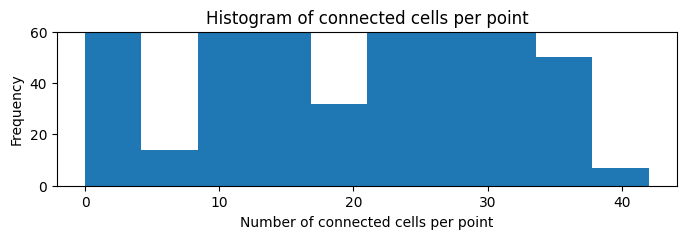

In [15]:
import matplotlib.pyplot as plt

# 各点の接続情報を持つ配列を作成する
point_connections1 = [[] for _ in range(len(full_points))]
for i, cell in enumerate(cells0):
    for j in cell:
        if j in num_1:
            point_connections1[j].append(i)

# 各点から繋がっているセルの数を数える
connected_cell_counts1 = np.array([len(connections) for connections in point_connections1])

# ヒストグラムを作成する
plt.figure(figsize=(8, 2))
plt.hist(connected_cell_counts1) #, bins=range(max(connected_cell_counts)+2))
plt.xlabel('Number of connected cells per point')
plt.ylabel('Frequency')
plt.title('Histogram of connected cells per point')
plt.ylim(0, 60)
plt.show()

In [16]:
example_tetra = minus_volume_tetra[0]
example_index = cells0[example_tetra]
example_point = full_points[example_index]

example_tetra, example_index, example_point

(916,
 array([ 26, 166, 276, 277]),
 array([[3.15076504e-05, 3.42660327e-03, 2.00845581e-03],
        [2.56667972e-05, 3.41830146e-03, 2.01145187e-03],
        [2.26662869e-05, 3.44261667e-03, 2.01028632e-03],
        [1.88009381e-05, 3.42469965e-03, 2.01448938e-03]]))

In [17]:
example_area = np.zeros(4)

for i in range(4):
    j = (i + 1) % 4
    k = (i + 2) % 4
    l = (i + 3) % 4

    vector0 = example_point[l] - example_point[j]
    vector1 = example_point[k] - example_point[j]
    example_area[i] = np.linalg.norm(np.cross(vector0, vector1)) / 2

max_area = example_area.argmax()

example_area, max_area

(array([8.47559289e-11, 1.21923494e-10, 5.21627719e-11, 8.95914442e-11]), 1)

In [18]:
j = (max_area + 1) % 4
k = (max_area + 2) % 4
l = (max_area + 3) % 4

example_normal = np.cross(example_point[l] - example_point[j], example_point[k] - example_point[j])
example_normal = example_normal / np.linalg.norm(example_normal)

example_distance = np.dot(example_point[max_area] - example_point[j], example_normal)
example_distance

7.151551791093082e-07

In [19]:
example_new_point = example_point[max_area] - 2 * example_normal * example_distance
np.dot(example_new_point - example_point[j], example_normal)

-7.151551791093095e-07

In [20]:
surface_index = full_mesh.surface_indices()
surface_index

pyvista_ndarray([    0,     1,     2, ..., 66720, 66719, 66722])

In [21]:
import numpy as np
index0 = np.array([10, 0, 20, 30])
area0  = np.array([1, 2, 3, 4])
surface0 = np.array([10, 30, 40, 50])

# area0の値が大きい順にインデックスをソートする
sorted_indices = np.argsort(area0)[::-1]

# ソートしたインデックスの中で、surface0に含まれない最初のものを探す
for index in sorted_indices:
    if index0[index] not in surface0:
        result = index0[index]
        break

print(result)


20


In [46]:
import numpy as np
import pyvista as pv

def process_mesh(filename, relaxation=1.0, overwrite=False, itaration=10):
    full_mesh = pv.read(filename)
    surface_index = full_mesh.surface_indices()
    all_positive_mesh  = full_mesh.copy()
    all_positive_cell  = all_positive_mesh.cells.reshape(-1, 5)[:, 1:]
    all_positive_point = all_positive_mesh.points.copy()

    for hoge in range(itaration):
        count = 0
        for index in all_positive_cell:
            point = all_positive_point[index]
            vectors = point[1:] - point[0]
            volume = (np.dot(vectors[0], np.cross(vectors[1], vectors[2]))) / 6

            if volume > 0:
                continue

            count += 1
            bool_array = [i in surface_index for i in index]
            # print(bool_array, sum(bool_array))

            area = np.zeros(4)
            for i in range(4):
                j = (i + 1) % 4
                k = (i + 2) % 4
                l = (i + 3) % 4

                vector0 = point[l] - point[j]
                vector1 = point[k] - point[j]

                area[i] = np.linalg.norm(np.cross(vector0, vector1))

            sorted_indices = np.argsort(area)[::-1]

            for i in sorted_indices:
                if index[i] not in surface_index:
                    max_area = i

            j = (max_area + 1) % 4
            k = (max_area + 2) % 4
            l = (max_area + 3) % 4

            normal = np.cross(point[l] - point[j], point[k] - point[j])
            normal = normal / np.linalg.norm(normal)

            distance = np.dot(point[max_area] - point[j], normal)
            new_point = point[max_area] - (1 + relaxation) * normal * distance

            all_positive_point[index[max_area]] = new_point

        print(count)
        if count == 0:
            break

        if hoge == itaration - 1:
            print('Warning: relaxation is not enough')

    if overwrite:
        all_positive_mesh.points = all_positive_point
    return all_positive_mesh

# all_positive_mesh = process_mesh('../data/random/Tetra_linspace0.vtu', 1.0, True)
all_positive_mesh = process_mesh('../data/random/Tetra_linspace0.vtu', 0.0, True, 1)


FileNotFoundError: File (/Users/gyakusu/Morphing/data/random/Tetra_linspace0.vtu) not found

In [47]:
positive_volumes = calculate_volume(all_positive_mesh)

plt.figure(figsize=(12, 2))
plt.hist(positive_volumes*1e12, bins=200)
plt.show()


NameError: name 'all_positive_mesh' is not defined

In [48]:
positive_volumes.min()

NameError: name 'positive_volumes' is not defined

In [49]:
for i in range(100):
    print(f"Processing {i}")
    all_positive_mesh = process_mesh(f'../data/random/Tetra_linspace{i}.vtu', 1.0, True, 10)
    # all_positive_mesh.save(f'../data/random/Tetra_linspace{i}.vtu')
    positive_volumes = calculate_volume(all_positive_mesh)
    print(positive_volumes.min())


Processing 0


FileNotFoundError: File (/Users/gyakusu/Morphing/data/random/Tetra_linspace0.vtu) not found

memo

[2, 15, 23, 41, 53, 60, ]

In [50]:
all_positive_mesh = process_mesh(f'../data/random/Tetra_linspace{53}.vtu', 1.0, False)


FileNotFoundError: File (/Users/gyakusu/Morphing/data/random/Tetra_linspace53.vtu) not found

## 以下のアルゴリズムはエッジを反転させる結果，STARでエラーになります．実行しないでください．

In [54]:
# def flip_cells(mesh, cells_to_flip):
#     # Get the cells from the mesh
#     cells = np.array(mesh.cells.tolist()).reshape(-1, 5)

#     # Flip the cells
#     for cell in cells_to_flip:
#         # Get the points of the tetrahedron
#         points = cells[cell]

#         # Reverse the order of the points
#         cells[cell] = points[[0, 1, 3, 2, 4]]

#     # Update the cells of the mesh
#     mesh.cells = cells.reshape(-1, 1)

#     return mesh

# full_mesh = flip_cells(full_mesh, minus_volume_tetra)
# minus_volume0 = calculate_volume(full_mesh) < 0
# minus_volume0.sum()

In [55]:
# output_span = 10

# for i in range(100):
#     full_mesh = pv.read(f'../data/random/Tetra_linspace{i}.vtu')
#     volumes = calculate_volume(full_mesh)
#     minus_volume_tetra = np.where(np.array(volumes) < 0)[0]

#     if i % output_span == 0:
#         print(f"itaration {i}, minus_volume_tetra: {minus_volume_tetra.shape}")

#     full_mesh = flip_cells(full_mesh, minus_volume_tetra)
#     volumes = calculate_volume(full_mesh)

#     # pv.save_meshio(f'../data/random/Tetra_linspace{i}.vtu', full_mesh, binary=False)
#     pv.save_meshio(f'../data/random/Tetra_linspace{i}.vtu', full_mesh, binary=True)
    